# Analyzing Word Frequencies in Executive Order Disposition Notes and Titles

Necessary Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import spacy

In [2]:
EO = pd.read_csv("executive_orders.csv")

In [3]:
import EO_processing.verify as verify
import EO_processing.additions as add

In [4]:
count_type_incorrect = verify.verify_type(EO, 'Presidential Document')
if count_type_incorrect > 0:
    EO_type_verified = verify.fix_type(EO, 'Presidential Document')
    print('Dataframe modified to ensure type consistency.')
else:
    EO_type_verified = EO
    print('Types are consistent.')
    
count_subtype_incorrect = verify.verify_subtype(EO_type_verified, 'Executive Order') 
if count_subtype_incorrect > 0:
    EO_subtype_verified = verify.fix_subtype(EO_type_verified, 'Executive Order')
    print('Dataframe modified to ensure subtype consistency.')
else:
    EO_subtype_verified = EO_type_verified
    print('Subtypes are consistent.')
EO_with_years = add.add_years(EO_subtype_verified, 'signing_date')
EO_with_months = add.add_months(EO_with_years, 'signing_date')

Types are consistent.
Subtypes are consistent.


### Frequency of "Revoked" in EO Disposition Notes

In [5]:
word1 = "Revoked"
EO_with_years["has_w1"] = EO_with_years["disposition_notes"].str.contains(fr"\b{word1}\b")

count_w1 = EO_with_years.groupby("year")["has_w1"].sum().reset_index()
count_w1 = count_w1.reset_index()

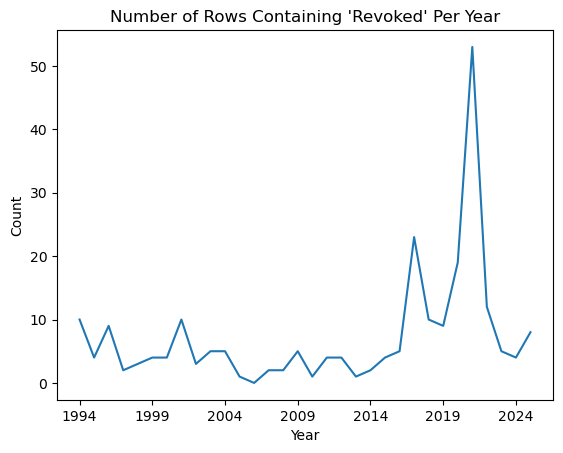

In [6]:
sns.lineplot(data=count_w1, x="year", y="has_w1")

plt.title(f"Number of Rows Containing '{word1}' Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(count_w1['year'][::5])
plt.show()


### Frequency of "Amends" in EO Disposition Notes

In [7]:
word2 = "Amends"
EO_with_years["has_w2"] = EO_with_years["disposition_notes"].str.contains(fr"\b{word2}\b")

count_w2 = EO_with_years.groupby("year")["has_w2"].sum().reset_index()
count_w2 = count_w2.reset_index()

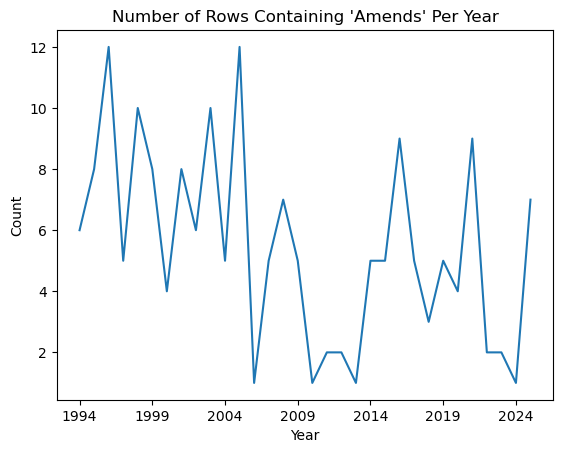

In [8]:
sns.lineplot(data=count_w2, x="year", y="has_w2")

plt.title(f"Number of Rows Containing '{word2}' Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(count_w2['year'][::5])



plt.show()


### Frequency of Amends vs Revoked over time

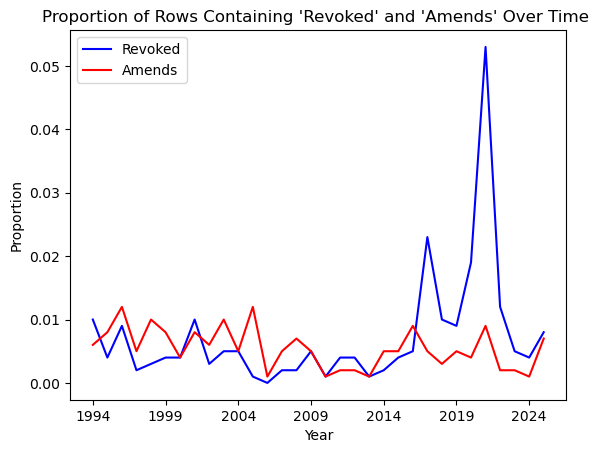

In [9]:
count_w1['prop_w1'] = count_w1['has_w1'] / len(EO_with_years)
count_w2['prop_w2'] = count_w2['has_w2'] / len(EO_with_years)

sns.lineplot(data=count_w1, x="year", y="prop_w1", color="blue", label=(f"{word1}"))
sns.lineplot(data=count_w2, x="year", y="prop_w2", color="red", label=(f"{word2}"))

plt.title(f"Proportion of Rows Containing '{word1}' and '{word2}' Over Time ")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.xticks(count_w1['year'][::5])
plt.show()

### Most Common Tokens in EO Titles

In [10]:
nlp = spacy.load("en_core_web_sm")

In [18]:
all_titles = " ".join(EO['title'].tolist())

doc = nlp(all_titles)
words = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
word_counts = Counter(words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

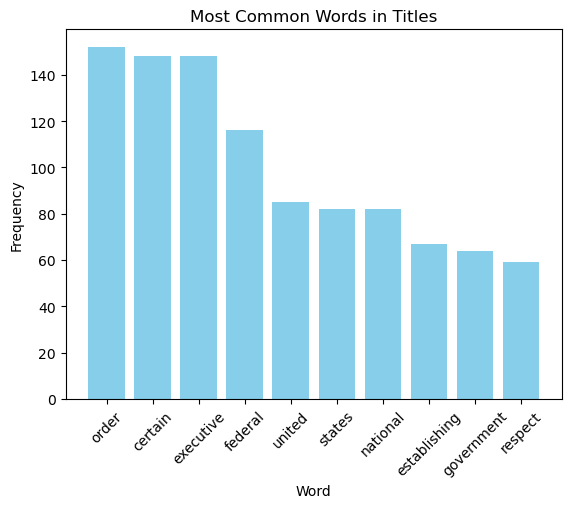

In [19]:
plt.bar(words, counts, color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Titles')
plt.xticks(rotation=45)
plt.show()